In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
# Loading data from CSV file CarRentalData
dataset = pd.read_csv('CarRentalData.csv')


In [ ]:
# Data Cleaning
# replace missing values with mean
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
dataset[['rating', 'renterTripsTaken', 'reviewCount']] = imputer.fit_transform(dataset[['rating', 'renterTripsTaken', 'reviewCount']])

# drop rows with missing values
dataset.dropna()
print(dataset)


      fuelType    rating  renterTripsTaken  reviewCount location.city  \
0     ELECTRIC  5.000000              13.0         12.0       Seattle   
1     ELECTRIC  5.000000               2.0          1.0       Tijeras   
2       HYBRID  4.920000              28.0         24.0   Albuquerque   
3     GASOLINE  5.000000              21.0         20.0   Albuquerque   
4     GASOLINE  5.000000               3.0          1.0   Albuquerque   
...        ...       ...               ...          ...           ...   
5846  GASOLINE  5.000000              32.0         27.0      Honolulu   
5847    HYBRID  5.000000              17.0         16.0          Aiea   
5848  GASOLINE  4.940000              18.0         17.0        Kailua   
5849  GASOLINE  4.920325               1.0          0.0       Waipahu   
5850  GASOLINE  5.000000              16.0         14.0        Kailua   

     location.country  location.latitude  location.longitude location.state  \
0                  US          47.449107    

In [ ]:
# Data Transformation
# Transforming data with String values into Integer value

# dictionary to store mapping between vehicle type to numeric value
mpVehicleTypeToInt = {}  

j = 0

for i in set(dataset['vehicle.type']) :
    mpVehicleTypeToInt[i] = j
    j += 1

    
vehicleTypeNormalisedList=[]

for i in dataset['vehicle.type']:
     vehicleTypeNormalisedList.append(mpVehicleTypeToInt[i])

dataset['vehicleTypeNormalised']=vehicleTypeNormalisedList 
# -------------------------------------------------------------------

# dictionary to store mapping between fuel type to numeric value
mpFuelToInt = {}  

j = 0

for i in set(dataset['fuelType']) :
    mpFuelToInt[i] = j
    j += 1

    
fuelNormalisedList=[]

for i in dataset['fuelType']:
     fuelNormalisedList.append(mpFuelToInt[i])

dataset['fuelNormalised']=fuelNormalisedList 
# -------------------------------------------------------------------
# dictionary to store mapping between location city  to numeric value
mpLocationToInt = {}  

j = 0

for i in set(dataset['location.city']) :
    mpLocationToInt[i] = j
    j += 1

    
locationNormalisedList=[]

for i in dataset['location.city']:
     locationNormalisedList.append(mpLocationToInt[i])

dataset['locationNormalised']=locationNormalisedList 

In [ ]:

#Data reduction
categorical_columns = ['location.latitude', 'location.longitude',  'location.country','owner.id'] 
dataset = dataset.drop(columns=categorical_columns, axis=1)


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

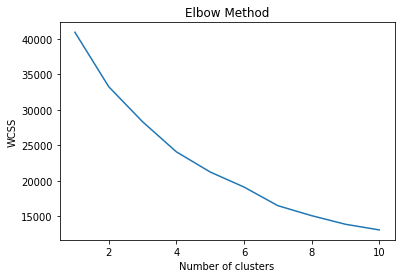

In [ ]:
# Select relevant attributes
X = dataset[['rating', 'rate.daily', 'renterTripsTaken','reviewCount','vehicleTypeNormalised','fuelNormalised','locationNormalised']]


# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Find the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [123]:
# Run K-Means clustering with k=3 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)
kmeans.fit(X_scaled)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Add the cluster labels to the original dataset
dataset['cluster'] = labels

# Print the size of each cluster
print(dataset['cluster'].value_counts())

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0    4212
2     840
1     799
Name: cluster, dtype: int64


<Axes: xlabel='renterTripsTaken', ylabel='rate.daily'>

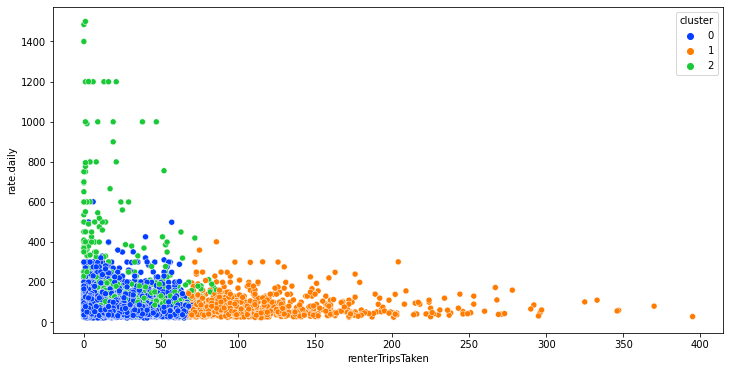

In [119]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='renterTripsTaken',y='rate.daily',data=dataset,hue='cluster',palette='bright')

<Axes: xlabel='renterTripsTaken', ylabel='reviewCount'>

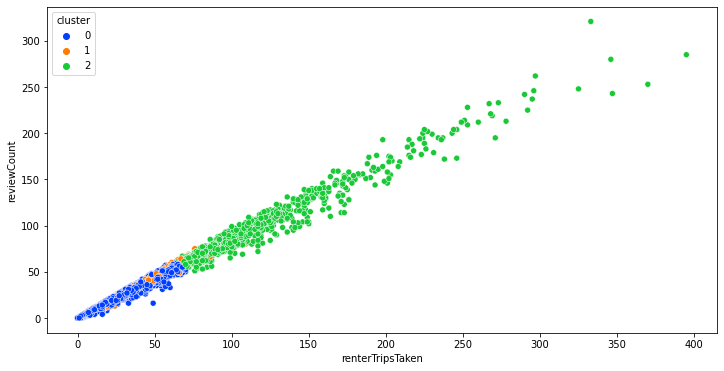

In [ ]:
# Plotting various parameters and grouping them according to clusters
plt.figure(figsize=(12,6))
sns.scatterplot(x='renterTripsTaken',y='reviewCount',data=dataset,hue='cluster',palette='bright')

<Axes: xlabel='location.state', ylabel='rate.daily'>

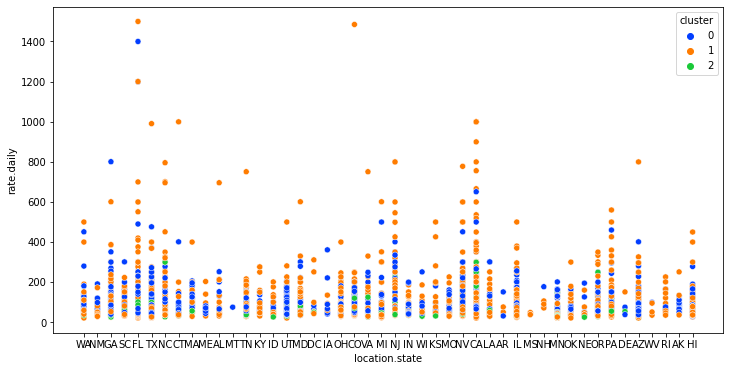

In [ ]:
# Plotting various parameters and grouping them according to clusters
plt.figure(figsize=(12,6))
sns.scatterplot(x='location.state',y='rate.daily',data=dataset,hue='cluster',palette='bright')

<Axes: xlabel='reviewCount', ylabel='rate.daily'>

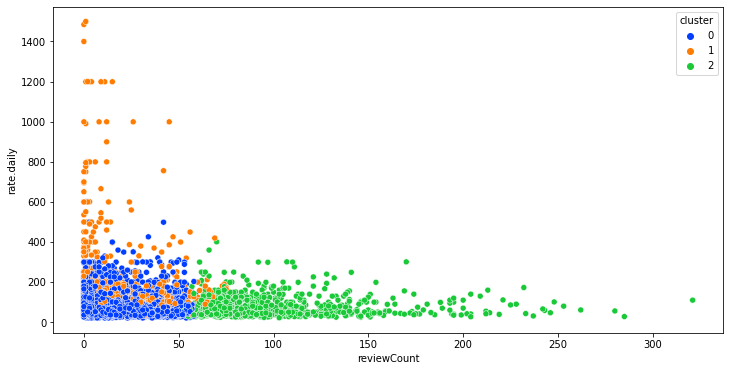

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='reviewCount',y='rate.daily',data=dataset,hue='cluster',palette='bright')

<Axes: xlabel='renterTripsTaken', ylabel='rating'>

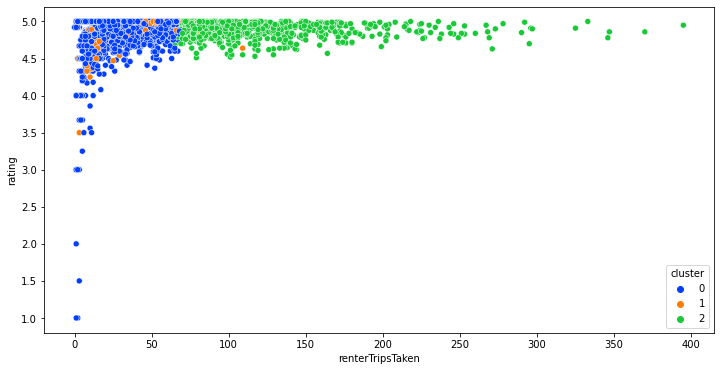

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='renterTripsTaken',y='rating',data=dataset,hue='cluster',palette='bright')

<Axes: xlabel='location.state', ylabel='vehicle.type'>

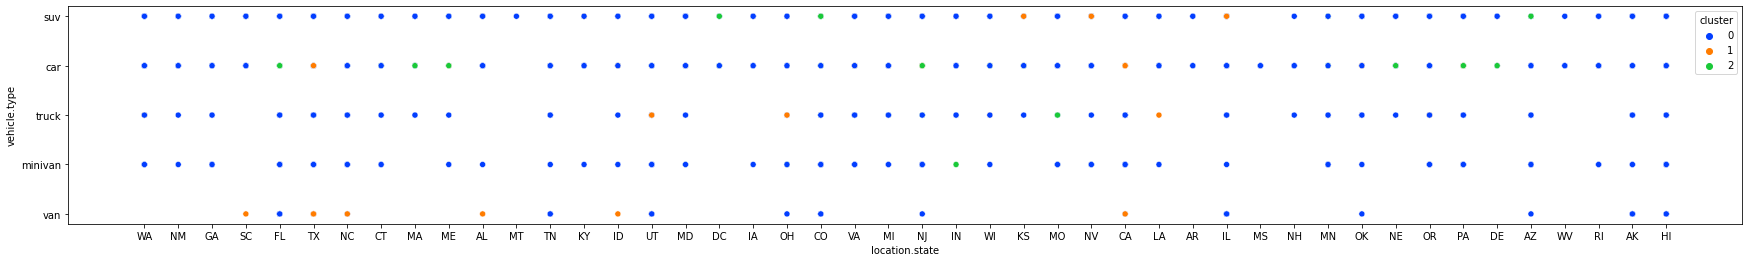

In [ ]:
plt.figure(figsize=(30,4))
sns.scatterplot(x='location.state',y='vehicle.type',data=dataset,hue='cluster',palette='bright')

<Axes: xlabel='vehicle.type', ylabel='rate.daily'>

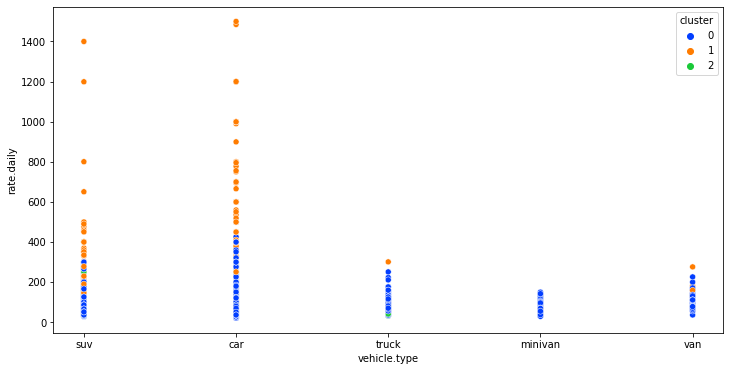

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='vehicle.type',y='rate.daily',data=dataset,hue='cluster',palette='bright')

In [121]:
#Using Association mining to mine rules for the cities and the company of vehicles used
# Selecting city and company attributes in subdataset 
dataset_subset = dataset[['location.city', 'vehicle.make']]

# Converting categorical variables into binary format
dataset_encoded = pd.get_dummies(dataset_subset)

# Performing association rule mining using Apriori algorithm
freq_itemsets = apriori(dataset_encoded, min_support=0.0005, use_colnames=True)
# print(freq_itemsets)
rules = association_rules(freq_itemsets, metric="confidence", min_threshold=0.7)

# Printing the generated association rules

a_b_rules = rules[rules['antecedents'].apply(lambda x: len(x) == 1) & rules['consequents'].apply(lambda x: len(x) == 1)]
a_b_rules = a_b_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
a_b_rules['antecedents'] = a_b_rules['antecedents'].apply(lambda x: list(x)[0])
a_b_rules['consequents'] = a_b_rules['consequents'].apply(lambda x: list(x)[0])

# Print the A -> B association rules
print(a_b_rules)

                     antecedents             consequents   support  \
0          location.city_Bedford     vehicle.make_Nissan  0.001538   
1          location.city_Boulder      vehicle.make_Tesla  0.000513   
2        location.city_Cambridge      vehicle.make_Tesla  0.000513   
3         location.city_Carlsbad        vehicle.make_BMW  0.000684   
4           location.city_Duluth      vehicle.make_Tesla  0.000513   
5        location.city_Edgewater      vehicle.make_Tesla  0.000513   
6         location.city_Lakewood     vehicle.make_Toyota  0.004444   
7        location.city_Littleton      vehicle.make_Tesla  0.000513   
8   location.city_Mechanicsville     vehicle.make_Nissan  0.000855   
9           location.city_Mentor     vehicle.make_Toyota  0.000513   
10          location.city_Milton     vehicle.make_Toyota  0.000513   
11   location.city_Missouri City     vehicle.make_Toyota  0.003418   
12    location.city_Orange Beach    vehicle.make_Polaris  0.000513   
13       location.ci

In [122]:
#Using Association mining to mine rules for the cities
# Between city and particular model
# Select relevant variables
dataset_subset = dataset[['location.city', 'vehicle.model']]

# Convert categorical variables into binary format
dataset_encoded = pd.get_dummies(dataset_subset)

# Perform association rule mining using Apriori algorithm
freq_itemsets = apriori(dataset_encoded, min_support=0.0003, use_colnames=True)
# print(freq_itemsets)
rules = association_rules(freq_itemsets, metric="confidence", min_threshold=0.51)

# Print the generated association rules

a_b_rules = rules[rules['antecedents'].apply(lambda x: len(x) == 1) & rules['consequents'].apply(lambda x: len(x) == 1)]
a_b_rules = a_b_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
a_b_rules['antecedents'] = a_b_rules['antecedents'].apply(lambda x: list(x)[0])
a_b_rules['consequents'] = a_b_rules['consequents'].apply(lambda x: list(x)[0])

# Print the A -> B association rules
print(a_b_rules)

                     antecedents                       consequents   support  \
0          location.city_Bedford              vehicle.model_Sentra  0.001538   
1      location.city_Bloomington              vehicle.model_Escape  0.001880   
2          location.city_Boulder             vehicle.model_Model X  0.000342   
3          vehicle.model_Element           location.city_Bountiful  0.000342   
4                vehicle.model_2          location.city_Brown Deer  0.000342   
5        location.city_Cambridge             vehicle.model_Model X  0.000342   
6               vehicle.model_X7          location.city_Costa Mesa  0.000342   
7      location.city_Dania Beach             vehicle.model_Mustang  0.001025   
8            location.city_Doral             vehicle.model_Mustang  0.000342   
9        location.city_Fair Oaks             vehicle.model_Model 3  0.000342   
10     location.city_Foster City             vehicle.model_Model 3  0.000342   
11       location.city_Gibsonton        

In [ ]:
X = dataset[['vehicle.type', 'fuelType', 'rating', 'location.city', 'reviewCount','renterTripsTaken','vehicle.make','vehicle.model']]
y = dataset['rate.daily']

# Converting categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

# Adding a constant term for the intercept
X = sm.add_constant(X)

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fiting the linear regression model
model = sm.OLS(y_train, X_train).fit()


#  running model on testing data
y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: {:.2f}".format(mse))

Mean Squared Error: 4150.73
